# Question-1


- What are the 5 most listened to playlists?

```sql

SELECT playlist_id, COUNT(playlist_id) AS playlist_count
FROM plays
GROUP BY playlist_id
ORDER BY playlist_count DESC
LIMIT 5

```
---
- Given a user X, what are their 3 most listened to playlists?

```sql

SELECT playlist_id, COUNT(playlist_id) AS playlist_count
FROM plays
WHERE user_id = X
GROUP BY playlist_id
ORDER BY playlist_count DESC
LIMIT 3

```
---

- For a user X, recommend 5 playlists they would like that they haven’t heard before. Youcan attempt this via SQL or any other programming language of your choice. Please explain your logic.

```sql


SELECT playlist_id
FROM

(SELECT playlist_id
FROM playlists
WHERE user_id = X
UNION ALL
SELECT playlist_id
FROM playlists)

GROUP BY playlist_id
HAVING COUNT(playlist_id) == 1

```

We have all playlists on the table `playlists`. There is no other playlists in different tables instead of out of that table `playlists`. In this question, we need to create two set of playlists, the first set belongs to `X` listener. The second set will be our universal playlist set. When we take union of those two sets by using `UNION ALL`, we got duplicated rows corresponding to playlist_id. When we take `GROUP BY` of playlist_id over the unioned set, we will filter out duplicated playlist_id by using `HAVING`. The returning table will contains playlist_id, which listener X does not listen before.

# Question-2

To increase number of downloads of the app, we need to collect some basic statistics about downloads. So, we can ask those questions to our manager for performing basic time series analysis, below

- Trends
- Seasonal Movements
- Cyclical Movements (Patterns)
- Irregular Fluctuations (Noise, Residual)
- Some important days: For instances, if we make any promo to increase downloads at any days before, we need keep those days.
- In addition, montly, seasonal, quarterly cumulative information about downloads.

After got those information, we can make a resonable forcasting about our expectations. According to the result of that basic analysis, we can make some adjustment about our expectations to fulfill them before more deeply approaching.

We analyze current user/customer/listener's behavior from our historical data and streaming data
(DWH, Data Lake, Data Marts, HDFS, Hadoop, Spark) and streaming data (Kafka Cluster, Flink, Spark Streaming). If we find valuable insights within confidence level, we  can once segment customers to different segments. This segmentation can be designed to fulfill the following requirements. We need to ask those information or models to manager or colleague.

- User Engagement
- Churn
- Retention

When we take into those knowledge above account our assets, we have directly some concrete idea about current customer satisfactory related to directly our products and services. If we increase customer satisfactory, the returns would increase, and, this influence also affects number of downloads at the end of day since number of downloads have strongly relationship with customer satisfactory.  

According to our new assets, we can make a decision to improve customer satisfactory. That strategy would be either 

1. adding (a) new feature(s) or updating/removing old one(s), or 
2. making promo and online advertisement, or
3. social media platform, or
3. all of them.

When we follow up the strategy 1st, we need to take care about these two effects:

- Increasing engagement of current customer
- Increasing customer numbers

When we follow up the strategy 2nd, we need to get further historical information about online ad and promo, below:

- CTR
- CPM
- Conversion Rate
- Impressions and Pageviews

Releasing a new feature can boost product and services whether or not at the end of day. To understand the consequence of our actions, we need follow up an approach to test performance of action in terms of succeed or failed. In this step, we can refer to A/B Testing to deal with that issue.

We can assign users to different subgroup A and B corresponding to each new updating of app while performing A/B Testing. Since those each group has different variation under the same conditions (or external changes) except for version of app, we can figure out which new feature rougly performing either good or bad user experience. At the end of testing, we can make a decision for final changes about our product or services.


---


# Question-3

### Required Libs

In [2]:
# importing required libs
import pandas_profiling

import pandas as pd
import numpy as np
import statsmodels.api as sm

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
import math

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Reading Data and Formatting (JSON -> CSV)

In [2]:
reading json file and transform csv file
df_tmp = pd.read_json('sc_data_science_challenge.json', lines=True)
df_data = pd.DataFrame(df_tmp['data'].values.tolist()[0], columns=df_tmp['columns'].values.tolist()[0])
df_data.to_csv('sc_data.csv', index=False)

### Reading CSV Data

In [3]:
# reading file
df_data = pd.read_csv('sc_data.csv')

# sorting by ts
df_data = df_data.sort_values(['ts']).reset_index(drop=True)

# sampling 10 different rows randomly
df_data.sample(n=10, random_state=10)

ts country_code client_version listening_context  \
346009  1468035494           US        204.0.8         playlists   
632392  1468973732           US       204.0.24             users   
751020  1469324136           US        204.0.4            tracks   
648069  1469035783           US        204.0.0            tracks   
71462   1467160891           US        204.0.0            tracks   
219750  1467652778           GB       204.0.12            tracks   
662003  1469066009           GB       204.0.12        collection   
430949  1468308895           US        204.0.0            tracks   
44311   1467057721           GB       204.0.20         playlists   
280718  1467857242           US       204.0.20            tracks   

       recommender_algorithm_name                          track_id  \
346009              content-based  9dc07372fc140c616e17884d1ff943f4   
632392              content-based  e11bdc280ec22d19a026addb153ae27d   
751020              content-based  e2402bbc211467dfc821da77e4ab5677   
648069              content-based  2f7431a8dd25ec242d266f79f78056a6   
71462               content-based  4c78a4431c8b8c42c80b51e7c901ca6a   
219750              content-based  6155e20d1f3735ec32b29932c99c2a5a   
662003              content-based  e14a6fe6657357a2c774bf52647578a6   
430949              content-based  3901cad5a6a3a96e925df98e8b6ec2d1   
44311               content-based  7dad89b0adf10b5a9a13d29a1083d34f   
280718              content-based  76b462903b9bd906e9033a9b95a5b57a   

       track_genre_category  track_upload_date  track_duration  \
346009         HipHop & R&B         1464220800          594795   
632392         HipHop & R&B         1466985600          302794   
751020         HipHop & R&B         1459036800           50517   
648069                World         1458259200          409728   
71462    Dance & Electronic         1368316800          443697   
219750         HipHop & R&B         1400371200          236227   
662003                  Pop         1303344000          361918   
430949         HipHop & R&B         1451952000          309330   
44311    Dance & Electronic         1399852800          416724   
280718                  Pop         1467072000          373244   

        listen_duration                       listener_id  \
346009           594795  f7bb3bb0284723a5d712e4931e66ca37   
632392           302794  db35a649f4761bf8bd1f1633c262da53   
751020            50517  927c935ebf69049688b9fba191cbe09d   
648069           409728  acfe517ef2d995fa35318a1f4ec4ddf6   
71462            443697  b1c9e5a9c6567dd564648a2cdd0d33d1   
219750            25372  53b3c95a8dd51d9e9ab957d6b69486dd   
662003           111704  94ae21d38551ef79cb618a62e1195fa9   
430949           310639  4fa2587b45d744fb457a89d5a559a770   
44311              1829  47915ea2707dd7f8bc804b41c2079766   
280718           373244  d1e0eb7e272aae394296bc26a75e5ebc   

        listener_signup_date listener_top_genre_category_listened  \
346009            1409443200                         HipHop & R&B   
632392            1417478400                   Dance & Electronic   
751020            1428796800                   Dance & Electronic   
648069            1384387200                                World   
71462             1350432000                   Dance & Electronic   
219750            1382832000                         HipHop & R&B   
662003            1415404800                         HipHop & R&B   
430949            1359849600                   Dance & Electronic   
44311             1396396800                         HipHop & R&B   
280718            1260057600                   Dance & Electronic   

        listener_prev_month_listening_time  \
346009                        3.627581e+09   
632392                        3.237242e+09   
751020                        2.051267e+09   
648069                        3.608726e+09   
71462                         4.168437e+09   
219750                        3.855967e+09   
6620

# 2. Data Cleansing and Investigation of Ambiguous Data

Some data may be broken or messy. So, we need to remove this kind of data from our dataset. We can check out continues features, such as `listen_duration`, `track_duration` and other categorical features. In this part, we once checked out the range of `listen_duration` and `track_duration`. In our dataset, some features have less than zero value, which are not valid in terms of developing a model. So, we will get rid of them. 


In addition, we observed that some value of `listen_duration` feature is greater than value of `track_duration`. In this sense, it seems those values do not have a valid range. However, when we take into track looping account for playing option on SoundCloud, those values can be acceptable for our model. But, also, we can extract new features such as `n_loops`, `is_loop` over these cases.

In [4]:
# listing non valid values of features
d0 = df_data[df_data['listen_duration'] < 0][['listen_duration']].describe()
d1 = df_data[df_data['track_duration'] < 0][['track_duration']].describe()
d2 = df_data[df_data['track_duration'] < df_data['listen_duration']][['track_duration', 'listen_duration']].describe()
d3 = df_data[((df_data['track_duration'] == 0) & (df_data['listen_duration'] > 0))][['track_duration', 'listen_duration']].describe()

def highlight_index(s, idx):
    return ['background-color: yellow' if i == idx else '' for i in s.index]
        
def highlight_negs(s):
    negs = s < 0
    return ['background-color: red' if n else '' for n in negs]

for d in [d0, d1, d2, d3]:
    
    d = d.style.apply(lambda s: highlight_index(s,  'count')).apply(highlight_negs)
    display(d)

### A. Ambiguous Dataset

Zero value is acceptable for `track_duration` as long as `listen_duration` is also zero. However, we encountered a ambugious result about those features in the 3rd table, above. So, we took look at the details more deeply by using data profiling to either find root cause of that problem or make some assumptions.

The root cause of that problem may be related to either one or more or none of them `user's faults, application bugs, and recommendation algorithm`. To reduce problem space of that issue, we may start checking out some important features that would be have an effect on that problem. 

Firstly, we can think about `listener_id` feature is uniquely indendifier, which may give an important fingerprint to identify that problem about data. So, once we will collect suspicious listener ids which are satisfiying the condition, below:

```python
c = ((df_data['track_duration'] == 0) & (df_data['listen_duration'] > 0))
```

After we collected the suspicious listeners, we need to find some instances, which belong to the suspicious listeners but do not satisfiy the condition, above. If the size of the collection is zero, we may think the suspicious listeners don't have relevant activities like the others.

```python
listener_ids = df_data[c]['listener_id'].unique()

for i in listener_ids:
    d = df_data[((df_data['listener_id'] == i) & ~c)]
    display(d)
```

To make sure that our process is whether or not correct, we can apply same steps for `client_version`, `track_id`, `recommender_algorithm_name` respectively.

According to the following results, that problem most probably related to listener side. If we need to guess the suspicious listeners what are, we guess that they may be bots that retrieve data over website. However, If we get more data for listener, our guessings may chang. In this point, to develop a accurate and consistent model, we may remove invalid values of `track_duration` and `listen_duration`.

In [5]:
#  Finding possible suspicious dataset for each features
for f in df_data.columns.drop(['track_duration', 'listen_duration']):
    
    c = ((df_data['track_duration'] == 0) & (df_data['listen_duration'] > 0))

    df_sus = df_data[c][[f]].drop_duplicates().reset_index(drop=True)
    df_sus['suspicious'] = [1] * len(df_sus)

    df_tmp = pd.merge(df_data[~c], df_sus, on=f)
    df_tmp = df_tmp[df_tmp['suspicious'] == 1].groupby([f]).aggregate({f : ['count']})
#     df_tmp.sort_values((f, 'count'), inplace=True, ascending=False)
#     display(df_tmp)
    
    r = (len(df_sus) - len(df_tmp)) / len(df_sus) * 100
    print('<{}>\nTotal {}/{} [{}%] suspicious instances we may detected...\n'.format(f, len(df_sus) - len(df_tmp), len(df_sus), r))

<ts>
Total 495/629 [78.69634340222575%] suspicious instances we may detected...

<country_code>
Total 0/2 [0.0%] suspicious instances we may detected...

<client_version>
Total 0/3 [0.0%] suspicious instances we may detected...

<listening_context>
Total 0/5 [0.0%] suspicious instances we may detected...

<recommender_algorithm_name>
Total 0/3 [0.0%] suspicious instances we may detected...

<track_id>
Total 234/548 [42.700729927007295%] suspicious instances we may detected...

<track_genre_category>
Total 0/7 [0.0%] suspicious instances we may detected...

<track_upload_date>
Total 0/401 [0.0%] suspicious instances we may detected...

<listener_id>
Total 6/6 [100.0%] suspicious instances we may detected...

<listener_signup_date>
Total 0/6 [0.0%] suspicious instances we may detected...

<listener_top_genre_category_listened>
Total 0/2 [0.0%] suspicious instances we may detected...

<listener_prev_month_listening_time>
Total 6/6 [100.0%] suspicious instances we may detected...

<listene

In [6]:
# removing invalid values of `track_duration` and `listen_duration`.
df_data = df_data[df_data['listen_duration'] >= 0]
df_data = df_data[df_data['track_duration'] > 0]
df_data = df_data.reset_index(drop=True)

### B. Ambiguous Dataset (Duplicated Instances or Time Zone Problem?)

We encountered a problem that some listener is listening same/different track(s) at the exactly same time over either different countries or same country. You can reach that information that was highlighted on the table, below.

Before removing those instances over our data, we may make a guessing about their root cause of the problem, here:

1. The listener who played the same track one more in the exactly same time from different countries, which have different time zone. In case those people may have a trip US/GB to GB/US, those instances would be acceptable as long as the timestamp (ts) is wrongly added into this dataset. However, even if we accept that condition, we need to check validation of times after making adjustment of time zone.

2. The listener who played the same track one more in the exactly same time from same country may open the track on the seperated tabs on web browser, either deliberately or wrongly.

3. The listener who played the different tracks in the exactly same time from either same country or different countries may open the different tracks on the seperated tabs, respectively.

4. These instances may be either broken or belong to bots activity, or none of them. 

Since those guessings would not satisfy to us clearly at that point, we may remove those instances rather than keeping in our dataset. To make sure that those instances whether or not valid, we will create new feature related to `ts` in the next step.

#### Creating Time Base Features to Make Correct Adjustments

While we are calculating the local time, we just take applying time difference for US since GB already has actual time. The time difference between US and GB tends 6-hours to 11-hours for Eastern Time Zone (EST) and Hawaii Time Zone (HST).

It means, 
- GB is 11 hours ahead from HST
- GB is 6 hours ahead from EST

In that case, since we don't know the exact time zone of the instances, 11-hours time difference is more reasonable to shift the data.

- `click_time` is click time when listener clicks a track
- `local_click_time` is local click time that we applied time difference for different time zone
- `local_ts` is local ts that we applied time difference for different time zone
- `local_leaving_time` is leaving time when listener stops listening track

In [7]:
def convert(row, t, time_diff):
    if row['country_code'] == 'US':
        return row[t] - time_diff * 60 * 60 * 1000
    else:
        return row[t]

df_data['click_time'] = df_data['ts'] - df_data['listen_duration']

df_data['local_click_time'] = df_data[['country_code', 'click_time']].apply(lambda x: convert(x, 'click_time', 11), 1)

df_data['local_ts'] = df_data[['country_code', 'ts']].apply(lambda x: convert(x, 'ts', 11), 1)

df_data['local_leaving_time'] = df_data['local_click_time'] + df_data['listen_duration']

#### Time Adjustment: Comparing New Times

Accordig to the following plots, either feature `local_ts` or `local_click_time` would be better adjustment after applying time difference for different time zone. However, when we took look at more deeply corespoding to the table below, feature `local_ts` has some `listen_duration` greater than 1000 mili-seconds (1 sn). If we take into time precision account for those instances on our dataset, `local_click_time` has more precision rather than `local_ts` because it does not have any `listen_duration` less that 1000 ms. Therefore, `local_click_time` will be good point to work with it.

However, before moving forward with `local_click_time`, we need to verify that feature in terms of data consistency by using the method, below. 

```python
def verify_time_adjustment(is_listen_duration_include):
```

In that case, we calculated the time interval between listener's transaction. Let's call that time interval time as `waiting_time`. Listener waits for awhile to play next track. That waiting time has to be greater zero everytime as long as we have whole transactions of listeners.

If we have any negative `waiting_time`, we can think about those transactions were overlapping. In that case, some transactions are missing in our dataset. It makes sense as long as that dataset has to be subsampled one. It is most likely subsampled dataset.

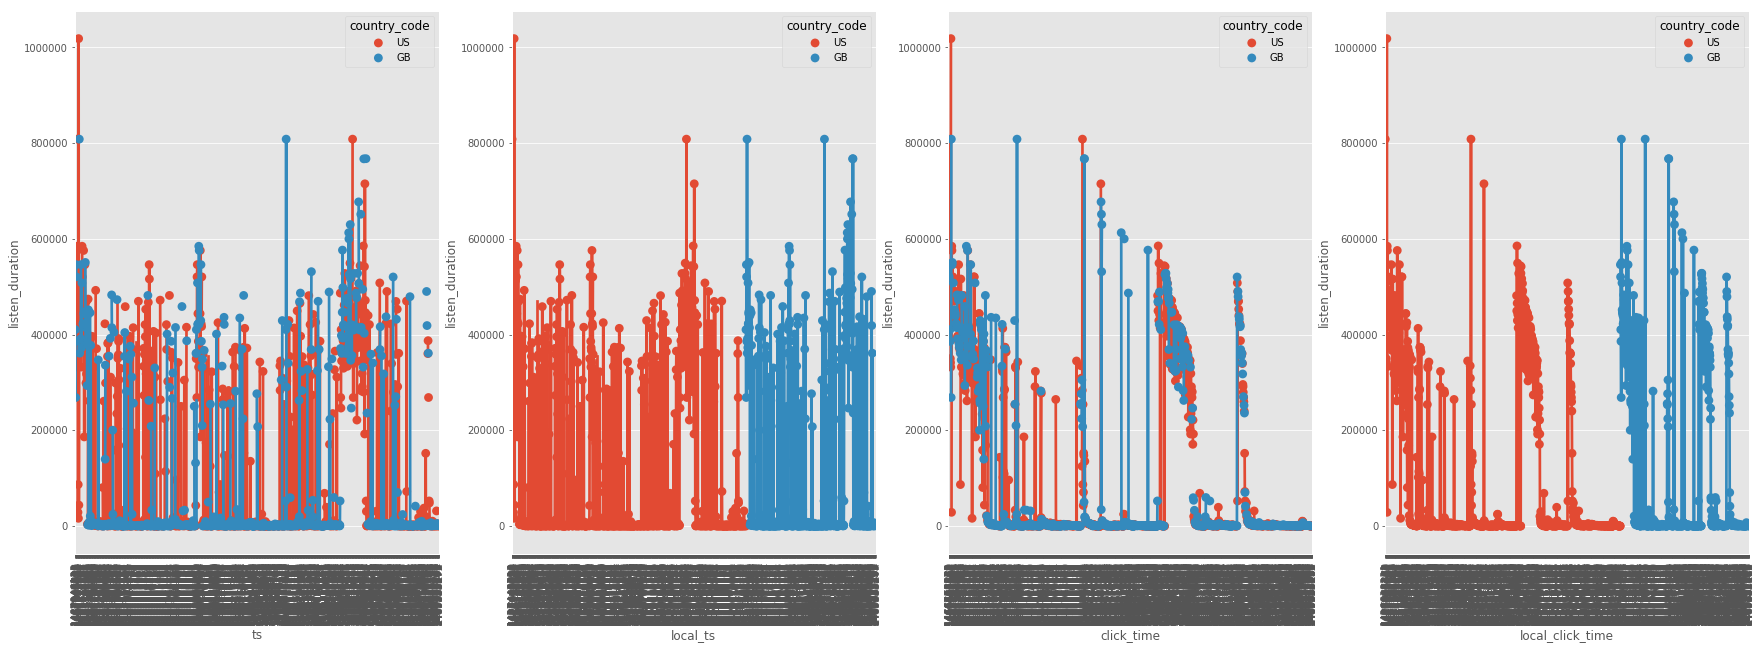

In [8]:
times = ['ts', 'local_ts', 'click_time', 'local_click_time']
fig, axes = plt.subplots(1, len(times), figsize=(30, 10))
for i, t in enumerate(times):
    df_tmp = df_data[df_data['listener_id'] == '0799139c100286a0dc5ec1acc768cdb4']
    df_tmp = df_tmp.sort_values([t])
    g = sns.pointplot(x=t, y='listen_duration', hue='country_code', dodge=True, data=df_tmp, ax = axes[i])
    g.set_xticklabels(g.get_xticklabels(), rotation=90);

#### Time Adjustment: Finding Unique Tracks by feature 'ts', 'local_ts', 'click_time', 'local_click_time'

In [9]:
def highlight_index(cols, idx):
    if cols.name == idx:

        colors = []
        for cell in cols:
            if cell == 1:
                colors.append('background-color: yellow')
            else:
                colors.append('background-color: red')

        return colors
    else:
        return ['' for cell in cols]

def highlight_durations(cols, idx):
    if cols.name == idx:
        colors = []
        for cell in cols:
            if min(cell) > 1000 or max(cell) > 1000:
                colors.append('background-color: pink')
            else:
                colors.append('')
        
        return colors
    else:
        return ['' for cell in cols]
    

def find_uniq_tracks(bytime):
    features = ['listener_id', 
                bytime,
                'track_id', 
                'listening_context', 
                'client_version']

    df_uniq_tracks = df_data.groupby(features).aggregate({
        'country_code' : {
            'codes' : lambda x : np.array(x),
            'n_uniq_codes' : lambda x : len(np.unique(x))
        },
        'listen_duration': {
            'durations' :  lambda x : np.array(x),
            'count' :  lambda x : len(np.unique(x))
        },
    })

    # Filtering number of unique tracks 
    df_uniq_tracks = df_uniq_tracks[df_uniq_tracks[('listen_duration', 'count')] > 1]
    
    # Styling of table
    df_style = df_uniq_tracks.style
    df_style = df_style.apply(lambda s: highlight_index(s, ('country_code', 'n_uniq_codes')))
    df_style = df_style.apply(lambda s : highlight_durations(s, ('listen_duration', 'durations')))
    
    return df_style

In [10]:
times = ['ts', 'local_ts', 'click_time', 'local_click_time']
for t in times:
    display('-----------------------Finding Unique Tracks by feature {}: Time Adjustment------------------------'.format(t))
    df = find_uniq_tracks(t)
    display(df)

'-----------------------Finding Unique Tracks by feature ts: Time Adjustment------------------------'

/usr/local/lib/python3.5/dist-packages/pandas/core/groupby.py:4291: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


'-----------------------Finding Unique Tracks by feature local_ts: Time Adjustment------------------------'

'-----------------------Finding Unique Tracks by feature click_time: Time Adjustment------------------------'

'-----------------------Finding Unique Tracks by feature local_click_time: Time Adjustment------------------------'

#### Verification of Time Adjustment

According to verication of time adjustment, our dataset has missing transactions since we got negative `waiting_time`. In additon, we can calculate `session_time` to verify missing transaction on data in the next cells. Because, listeners are listening to tracks within specific session time over the platform. Total listening time of track could be equal to session time would be good option to apply sanity check everthing going well.

If we get negative time difference when taking `session_time` and total_listening_time, we turn out that some transactions are missing. It means that that dataset were subsampled of listeners.

However, We will still use `local_click_time` ignoring `listen_duration` to calculate `waiting_time` and `detention_time/retention_time` in the next cells because it has more time precision on the table above.

In [11]:
# Calculating waiting time between different track for each listener
def cal_waiting_time(row, listener_history, is_listen_duration_include):
    
    k = row['listener_id']
    local_leaving_time = row['local_leaving_time']
    local_click_time = row['local_click_time']
    local_ts = row['local_ts']
    listen_duration = row['listen_duration']

    if is_listen_duration_include is None:
#         Is Listen Duration Included: None
#         Negative Interval Ratio: 0.0
#         Total Negative Interval: 0
        waiting_time = np.nan
        if k in listener_history:
            waiting_time = local_click_time - listener_history[k]
        listener_history[k] = local_click_time
    else:
        if is_listen_duration_include:
#             Is Listen Duration Included: True
#             Negative Interval Ratio: 0.8298919881594223
#             Total Negative Interval: 682665
            waiting_time = np.nan
            if k in listener_history:
                waiting_time = local_ts - (listener_history[k] + listen_duration)
            listener_history[k] = local_ts
        else:
#             Is Listen Duration Included: False
#             Negative Interval Ratio: 0.8298919881594223
#             Total Negative Interval: 68266
            waiting_time = np.nan
            if k in listener_history:
                waiting_time = local_click_time - listener_history[k]
            listener_history[k] = local_leaving_time

    
    return waiting_time


# sanity checking the range of new feature
def verify_time_adjustment(is_listen_duration_include):
    listener_history = {}
    
    df_tmp = df_data[['listener_id', 'track_id', 'ts', 'local_ts', 'click_time', 
                  'local_click_time', 'local_leaving_time', 'listen_duration']]
    
    if is_listen_duration_include is None:
        df_tmp = df_tmp.sort_values(['listener_id', 'local_click_time'])
    else: 
        if is_listen_duration_include:
            df_tmp = df_tmp.sort_values(['listener_id', 'local_ts'])
        else:
            df_tmp = df_tmp.sort_values(['listener_id', 'local_leaving_time'])

    df_waiting = df_tmp.apply(lambda row : cal_waiting_time(row, listener_history, is_listen_duration_include), 1)

    n_negs = len(df_waiting[df_waiting < 0])
    negs_ratio = n_negs / len(df_waiting)
    print('listen_duration Included: {}\nNegative Interval Ratio: {}\nTotal Negative Interval: {}'.format(is_listen_duration_include, negs_ratio, n_negs))


for c in [True, False, None]:
    verify_time_adjustment(c)
    print('------------------')

listen_duration Included: True
Negative Interval Ratio: 0.8298919881594223
Total Negative Interval: 682665
------------------
listen_duration Included: False
Negative Interval Ratio: 0.8298919881594223
Total Negative Interval: 682665
------------------
listen_duration Included: None
Negative Interval Ratio: 0.0
Total Negative Interval: 0
------------------


In [12]:
# sanity checking the range of new feature
df_session = df_data.groupby(['listener_id', 'track_id']).aggregate({
    'local_click_time': ['min'],
    'local_leaving_time': ['max'],
    'listen_duration' : ['sum'],
})

df_session['session_time'] = df_session[('local_leaving_time', 'max')] - df_session[('local_click_time', 'min')]

df_diff = df_session['session_time'] - df_session[('listen_duration', 'sum')]
df_diff = df_diff[df_diff < 0]
                            
print('{}% instances have greater session_time than total listening duration'.format(len(df_diff) / len(df_session) * 100))

3.9477020967574603% instances have greater session_time than total listening duration


# 3. Feature Extractions/Engineering

<img src='img/waiting_time.jpg'>


In this part, we created new features to find valuable insight in EDA and build high accurate ML model, below:

- `waiting_time` : Listener waits for awhile to play next track before point `ts`
- `detention_time` is showing a time interval about the same track that was listened by the listener before point `ts`.

In [13]:
# Calculating waiting time between different track for each listener
listener_history = {}
def cal_waiting_time(row):
    k = row['listener_id']
    local_click_time = row['local_click_time']

    waiting_time = np.nan
    if k in listener_history:
        waiting_time = local_click_time - listener_history[k]
    listener_history[k] = local_click_time
    
    return waiting_time

features = ['listener_id', 'local_click_time']
df_data.sort_values(features, inplace=True)
df_data['waiting_time'] = df_data[features].apply(cal_waiting_time, 1)

# sanity checking the range of new feature
assert len(df_data[df_data['waiting_time'] < 0]) == 0

In [14]:
# Calculating detention time between same different track for each listener
listener_history = {}
def cal_detention_time(row):
    
    k = (row['listener_id'], row['track_id'])
    local_click_time = row['local_click_time']
    
    detention_time = np.nan
    if k in listener_history:
        detention_time = local_click_time - listener_history[k]
    listener_history[k] = local_click_time

    return detention_time

features = ['listener_id', 'track_id', 'local_click_time']
df_data.sort_values(features, inplace=True)
df_data['detention_time'] = df_data[features].apply(cal_detention_time, 1)

# sanity checking the range of new feature
assert len(df_data[df_data['detention_time'] < 0]) == 0

- `user_membership_time` is membership duration of listener
- `track_living_time` shows living duration of a track in the system from released time.
- `is_loop` keeps tracking loop option as a flag.
- `n_loops` is a ratio of number of loop that listener plays a track. (This is an assumption)
- `per_listen` is percentage of completed listening time of a track

In [15]:
# feature extractions
df_data['user_membership_time'] = df_data['ts'] - df_data['listener_signup_date']
df_data['track_living_time'] = df_data['ts'] - df_data['track_upload_date']

# sanity checking the range of new features
assert len(df_data[df_data['user_membership_time'] < 0]) == 0
assert len(df_data[df_data['track_living_time'] < 0]) == 0

# feature extractions
df_data['is_loop'] = (df_data['track_duration'] < df_data['listen_duration']) * 1
df_data['n_loops'] = df_data['listen_duration'] / df_data['track_duration']
df_data['n_loops'] = df_data['n_loops'].apply(lambda x : 0 if x == float('inf') else x)
df_data['per_listen'] = df_data['n_loops'].apply(lambda x : 1 if x >= 1 else x)
# df_data['per_remaining_listen'] = 1 - df_data['per_listen']

# sanity checking the range of new features
assert len(df_data[df_data['n_loops'] == float('inf')]) == 0
assert len(df_data[df_data['per_listen'] > 1]) == 0
# assert len(df_data[df_data['per_remaining_listen'] < 0]) == 0

### Accumulating Cumulative Features by Windowing

Some listener sometimes may prefer listening to some special tracks one more times and different times if they have some engagement with specific tracks. Therefore, they most likely may listen to same track next time. 

Some important cumulative information that was collected could be better option in our feature evaluation and prediction stage about skipping tracks in the future. So, We can create those new features by applying windowing on data. 

- `acc_n_played` is counting how many time played the track before point `ts`.
- `acc_mean_per_listen` is calculating mean of listening percentage of track before point `ts`.
- `acc_std_per_listen` is calculating std of listening percentage of track before point `ts`.
- `acc_n_genre` is counting how many time played the track before point `ts`.
- `acc_per_top_genre` is calculating the cumulative percentage of top genre that played before point `ts`
- `acc_is_loop` is calculating how many times listener looped the track before point `ts`
In addition, we can collect any kind of windowing statistics about data. However, we need to modify those approaches for windowing techniques. So, we just applied simple formula such as mean, std on windows. 

Please, note that this is not a classical rolling statistics to use pandas' rolling function to apply statistical methods directly.


In [16]:
# Calculating windowing(rolling)* statistics (count, mean, std) for track
def acc_track_statistics(row, history):
    
    k = (row['listener_id'], row['track_id'])
    per_listen = row['per_listen']
    
    acc_count = 0
    total_per_listen = 0
    std_per_listen = np.nan
    
    if k in history:
        acc_count, total_per_listen, std_per_listen = history[k]
        
        if std_per_listen is np.nan:
            std_per_listen = 0
        
        acc_std_per_listen = np.nan
        if acc_count > 0:
            acc_std_per_listen = math.pow(acc_count * std_per_listen, 2) + math.pow(per_listen - (total_per_listen / acc_count), 2)
            acc_std_per_listen = math.sqrt(acc_std_per_listen / acc_count)
            
        history[k] = (acc_count + 1, total_per_listen + per_listen, acc_std_per_listen)
    else:
        history[k] = (1, per_listen, std_per_listen)
    
    acc_mean_per_listen = 0
    if acc_count > 0:
        acc_mean_per_listen = total_per_listen / acc_count
        
    return (acc_count, acc_mean_per_listen, std_per_listen)

# Calculating windowing(rolling)* statistics (count, percentage) for genre
def acc_genre_statistics(row, history):
    curr_genre = row['track_genre_category']
    curr_top_genre = row['listener_top_genre_category_listened']
    
    acc_n_genre = 0
    if curr_genre in history:
        acc_n_genre = history[curr_genre]
    
    acc_per_top_genre = 0
    if curr_top_genre in history:
        acc_per_top_genre = history[curr_top_genre] / (row.name + 1)
    
    history[curr_genre] = acc_n_genre + 1
    return (acc_n_genre, acc_per_top_genre)

# Calculating how many times the track was looped before
def acc_is_loop(row, history):
    k = (row['listener_id'], row['track_id'])
    is_loop = row['is_loop']
    
    count = 0
    if k in history:
        count = history[k]
    history[k] = count + 1
    
    return count

df_data.sort_values(['listener_id', 'local_click_time', 'track_id'], inplace=True)

cols =['acc_n_played', 'acc_mean_per_listen', 'acc_std_per_listen']
history = {}
df_acc_track = df_data.apply(lambda row: acc_track_statistics(row, history), 1)
df_acc_track = pd.DataFrame(df_acc_track.values.tolist(), columns=cols)

cols = ['acc_n_genre', 'acc_per_top_genre']
history = {}
df_acc_genre = df_data.apply(lambda row: acc_genre_statistics(row, history), 1)
df_acc_genre = pd.DataFrame(df_acc_genre.values.tolist(), columns=cols)

history = {}
df_acc_is_loop = df_data.apply(lambda row: acc_is_loop(row, history), 1)

# sanity checking the range of new features
assert len(df_acc_track) == len(df_data)
assert len(df_acc_genre) == len(df_data)
assert len(df_acc_is_loop) == len(df_data)

df_data['acc_is_loop'] = df_acc_is_loop

df_tmp = pd.concat([df_data, df_acc_track, df_acc_genre], join='inner', axis=1)

# sanity checking the range of new feature
assert len(df_tmp) == len(df_data)
df_data = df_tmp

Creating features such as, `dow` (day of week), `day`, `month`, `day_part` (midnight, early_morning, dawn, morning, midday, afternoon, dusk, evening), `is_weekend` and `year`  over timestamps (`local_click_time`, `track_upload_date`)

In [ ]:
def __convert_to_day_part(ts):

    if (0 == ts.hour and ts.minute == 0):
        return 'midnight'
    elif (0 <= ts.hour and ts.hour <= 5):
        return 'early_morning'
    elif (6 == ts.hour and ts.minute == 0):
        return 'dawn'
    elif (6 <= ts.hour and ts.hour <= 11):
        return 'morning'
    elif (12 == ts.hour and ts.minute == 0):
        return 'midday'
    elif (12 <= ts.hour and ts.hour <= 17):
        return 'afternoon'
    elif (18 == ts.hour and ts.minute == 0):
        return 'dusk'
    elif (18 <= ts.hour and ts.hour <= 23):
        return 'evening'

for f in ['local_click_time', 'track_upload_date']:

    # extracting some features over date to take look at the details of dataset
    df_data[f] = pd.to_datetime(df_data[f],unit='s')
    df_data[f + '_dow'] = df_data[f].apply(lambda t : t.isoweekday())
    df_data[f + '_day'] = df_data[f].apply(lambda t : t.day)
    df_data[f + '_month'] = df_data[f].apply(lambda t : t.month)
    df_data[f + '_daypart'] = df_data[f].apply(__convert_to_day_part)
    df_data[f + '_is_weekend'] = df_data[f].apply(lambda t : 1 if t.day == 6 or t.day == 7 else 0) * 1

    if f == 'track_upload_date':
        df_data[f + '_year'] = df_data[f].apply(lambda t : t.year)


Dropping out some features before applying data profiling.

In [18]:
# Dropping out some features before applying data profiling.
drop_list = ['ts', 'track_upload_date', 'listener_signup_date', 'click_time', 'local_ts', 'local_leaving_time']
df_data.drop(drop_list, 1, inplace=True, errors='ignore')

for c in df_data.columns:
    print(c)

country_code
client_version
listening_context
recommender_algorithm_name
track_id
track_genre_category
track_duration
listen_duration
listener_id
listener_top_genre_category_listened
listener_prev_month_listening_time
listener_prev_month_avg_daily_tracks_listened
local_click_time
waiting_time
detention_time
user_membership_time
track_living_time
is_loop
n_loops
per_listen
acc_is_loop
acc_n_played
acc_mean_per_listen
acc_std_per_listen
acc_n_genre
acc_per_top_genre
local_click_time_dow
local_click_time_day
local_click_time_month
local_click_time_daypart
local_click_time_is_weekend
track_upload_date_dow
track_upload_date_day
track_upload_date_month
track_upload_date_daypart
track_upload_date_is_weekend
track_upload_date_year


# 4.Data Profiling

According to data profiling stage, we got those basic insights about our data and new features

- HipHop & R&B (53.0% of all instances) is the most highest genre listened by listeners.
- Listeners mostly are listening to tracks from US (63.4% of all instances)
- Listeners are using app whose version is mostly 204.0.0 (51.1% of all instances) 
- Listeners are listen to tracks mostly at afternoon (25.8%), morning (25.0%), and evening (24.9%) time, respectively.
- Listeners are prefering mostly tracks (58.1% of all instances) section to listen to tracks.
- Listeners are listing to tracks mostly business (71.1%) day not weekeds (28.9%). (This is related to time zone conversion)
- Listeners are not prefering loop tracks mostly. It is just 1.5% of all listeners who are looping track
- Listeners are most likely listening to tracks which were recommended by content-based algorithm (89.0%)
- Average of listen_duration is 302570 ms
- Average of track_duration is 525230 ms
- Average of waiting time is 1595000 ms
- Average of detention_time is 13482000 ms

In [31]:
pandas_profiling.ProfileReport(df_data, check_correlation=False)

In [3]:
# df_data.to_csv('tmp.csv', index=False)
df_data = pd.read_csv('tmp.csv')

Some features out of them are categorical features. So, We need to encode them by using one-hot-encoding (OHE) approaching. However, some of categorical features such as `client_version`,`track_id` and `listener_id` have highest cardinality. OHE would not be sufficient for those high cardinality features. The other categorical features such as `listening_context`, `recommender_algorithm_name`, and `listener_top_genre_category_listened` relatively have low cardinality. Therefore, We can transform the low cardinal features to OHE.

We can apply different techniques on the other high cardical categorical features to solve high cardinality rather than OHE. [https://www.kdnuggets.com/2016/08/include-high-cardinality-attributes-predictive-model.html]

For feature `listener_id`, we can segment listeners with respect to their listening history.
To perform segmentation, once we need to find similar listeners. Since dataset may have cold-start problem mostly, the segmentation would not give a good result in that case. To overcome cold-start problem, we need to either collect more dataset or articulate some information over our dataset. In articulation, matrix factorization (MF) will play important role.

In [4]:
table = pd.pivot_table(df_data, 
               index='listener_id', 
               values='listen_duration', 
               columns='track_genre_category', 
               aggfunc='sum', 
               fill_value=0)
    
table.head(10).style.apply(lambda cols: ['background-color: yellow' if cell > 0 else '' for cell in cols])

In MF, we articulate missing data about in matrix [L,G]. L denotes listener. G denotes genre of track. Each cell will have total listening time in the matrix according to L and G. MF is using SVD technique underhood.
So, we need to determine our k feature latent. In our case, we defined popular, unpopular track for k = 2

In [5]:
from scipy.sparse.linalg import svds

R = table.as_matrix()

listening_duration_mean = np.mean(R, axis = 1)
R_norm = R - listening_duration_mean.reshape(-1, 1)

U, sigma, Vt = svds(R_norm, k=3)

sigma = np.diag(sigma)

articulated_listening_duration = np.dot(np.dot(U, sigma), Vt) + listening_duration_mean.reshape(-1, 1)
articulated_table = pd.DataFrame(articulated_listening_duration, columns=table.columns, index=table.index)

articulated_table.head(10)

track_genre_category                 Classical        Country  \
listener_id                                                     
0001d5755511cae40e5b32d83a3decce  -2699.708835   -2340.311514   
000264c5b34ad04999535c8b6a8b86e2 -22808.491042  -52079.334884   
0002bb2abfc95fba77da3adf84f69e48  55524.205123  156898.721188   
000475010431369b2de9db784135acd0   1628.868144    1614.025289   
0005026f1b56d1bbd734cc78934993a2  -1704.342201    -719.470471   
000626408605f8e9373f7fa2e01d28a8  -5089.295749   -2148.393677   
000787fdf3a1c2e692dd455ab2cfbc64    -17.245513     -19.722538   
0007b0ebe27c7537b4a7e0add5ed0d04  -9313.954785  -10651.746168   
0008edace4f7b4369fac300a0f1f7755   -522.081909   -3923.917823   
000aefbc60a6f9a77371b39ed1ec54d3  -4639.639894   -1669.483714   

track_genre_category              Dance & Electronic  HipHop & R&B  \
listener_id                                                          
0001d5755511cae40e5b32d83a3decce        4.137636e+05  1.134734e+05   
000264c5b34ad04999535c8b6a8b86e2        1.531193e+07  8.583244e+06   
0002bb2abfc95fba77da3adf84f69e48        9.061745e+05  1.479010e+05   
000475010431369b2de9db784135acd0        7.627237e+01  3.142385e+01   
0005026f1b56d1bbd734cc78934993a2       -1.186200e+02  2.240265e+03   
000626408605f8e9373f7fa2e01d28a8       -3.542084e+02  6.689601e+03   
000787fdf3a1c2e692dd455ab2cfbc64        2.160931e-01  4.289079e+03   
0007b0ebe27c7537b4a7e0add5ed0d04        1.167075e+02  2.316445e+06   
0008edace4f7b4369fac300a0f1f7755        1.705992e+06  2.679946e+04   
000aefbc60a6f9a77371b39ed1ec54d3       -2.781154e+02  1.243765e+05   

track_genre_category                      Jazz          Latin          Metal  \
listener_id                                                                    
0001d5755511cae40e5b32d83a3decce  -4299.832030   -5353.639044   -2680.149100   
000264c5b34ad04999535c8b6a8b86e2 -24203.805434   -3219.785969  -45357.801824   
0002bb2abfc95fba77da3adf84f69e48 -63875.412654 -204118.551523  109212.846954   
000475010431369b2de9db784135acd0   1648.063349    1670.113150    1621.766809   
0005026f1b56d1bbd734cc78934993a2  -2835.551304   -4187.358421   -1180.693669   
000626408605f8e9373f7fa2e01d28a8  -8467.172370  -12503.771483   -3525.641309   
000787fdf3a1c2e692dd455ab2cfbc64     -5.899346      -1.047960     -19.189170   
0007b0ebe27c7537b4a7e0add5ed0d04  -3186.118391    -565.982034  -10363.684984   
0008edace4f7b4369fac300a0f1f7755  -2359.286067    -145.509002   -2975.085459   
000aefbc60a6f9a77371b39ed1ec54d3  -7817.030457  -11852.950707   -3077.061137   

track_genre_category                       Pop         Reggae          Rock  \
listener_id                                                                   
0001d5755511cae40e5b32d83a3decce  1.233497e+05   -6793.597709  9.100831e+04   
000264c5b34ad04999535c8b6a8b86e2  7.276967e+05   89318.380998  3.291212e+05   
0002bb2abfc95fba77da3adf84f69e48  1.028137e+07 -468304.096688  7.860475e+06   
000475010431369b2de9db784135acd0 -2.670756e+02    1700.760548  2.255555e+02   
0005026f1b56d1bbd734cc78934993a2  9.655907e+04   -6705.236162  7.319026e+04   
000626408605f8e9373f7fa2e01d28a8  2.883327e+05  -20022.346377  2.185517e+05   
000787fdf3a1c2e692dd455ab2cfbc64  6.272186e+01      40.839657 -8.403629e+01   
0007b0ebe27c7537b4a7e0add5ed0d04  3.387482e+04   22056.677504 -4.538631e+04   
0008edace4f7b4369fac300a0f1f7755 -9.291858e+02    2845.345340  2.205144e+03   
000aefbc60a6f9a77371b39ed1ec54d3  3.003804e+05  -18478.001234  2.243724e+05   

track_genre_category                     Speech        Unknown          World  
listener_id                                                                    
0001d5755511cae40e5b32d83a3decce   -1135.322787   -3944.817828    6125.334896  
000264c5b34ad04999535c8b6a8b86e2  106145.942178    5154.580774  102237.467632  
0002bb2abfc95fba77da3adf84f69e48  -54908.096971 -125606.847747  749612.576994  
000475010431369b2de9db784135acd0    1631.800477    1657.919236    14

After got fully filled matrix by applying MF, we can add a new feature (`user_membership_time`) related to listener. Therefore, we are ready to apply a clustering algortihm for listener segmentation

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

df_tmp = df_data[['listener_id', 'user_membership_time']].groupby(['listener_id']).aggregate({'user_membership_time' : ['max']})
df_tmp.columns = ['membership_time']
df_tmp = df_tmp.reset_index()

df_tmp = pd.merge(articulated_table.reset_index(), df_tmp, on=['listener_id']).set_index('listener_id')

pipeline = Pipeline([
                        ('scaler', Normalizer()),
                        ('kmeans', KMeans(n_clusters=3, random_state=3333))
                    ])

df_tmp['segment'] = pipeline.fit_predict(df_tmp.values.tolist())
display(df_tmp.groupby(['segment']).aggregate({'segment' :['count']}))

df_tmp = df_tmp.reset_index()[['listener_id', 'segment']]
df_data = pd.merge(df_data, df_tmp, on=['listener_id'])

# Removing listener_id
df_data.drop(['listener_id'], 1, inplace=True)

segment
          count
segment        
0         55897
1          1198
2           913

In [7]:
df_tmp = df_data.groupby(['client_version']).aggregate({'client_version' : ['count']})
df_tmp = df_tmp / df_tmp[('client_version', 'count')].sum()
df_tmp = df_tmp.sort_values([('client_version', 'count')])
df_tmp.columns = ['client_version_rank']

df_tmp = df_tmp.reset_index()

df_data = pd.merge(df_data, df_tmp, on=['client_version'], how='left')
# Removing listener_id
df_data.drop(['client_version'], 1, inplace=True)

In [8]:
# Applying Encoding for coverting string to decimal
from sklearn.preprocessing import LabelEncoder

cols = df_data.select_dtypes(include='object').columns.drop(['local_click_time'])

encoders = {}

for c in cols:
    encoder = LabelEncoder()
    df_data[c] = encoder.fit_transform(df_data[c].values.tolist())
    encoders[c] = encoder

In [9]:
cols = {
    'segment' : 'S',
    'listening_context' : 'LC',
    'recommender_algorithm_name' : 'RAN',
    'track_genre_category' : 'TGC',
    'listener_top_genre_category_listened' : 'LTGCL'
}

dfs = []
for c in cols:
    df = pd.get_dummies(df_data[c], prefix=cols[c])
    dfs.append(df)
    
df_tmp = pd.concat(dfs, 1)
df_data = pd.concat([df_data, df_tmp], 1)

# Removing features that were transformed into OHE
df_data = df_data.drop(list(cols.keys()), 1)
# df_data

country_code  track_id  track_duration  listen_duration  \
0                  0    270498          413933           413933   
1                  0     47364          402640           110722   
2                  0     13862          494811           193818   
3                  1    282616          685960           826718   
4                  1     36653          645225           645225   
5                  1    121551          458001           458001   
6                  1    353260          435365           435365   
7                  1    224234          423566           423566   
8                  1     50011          361585           361585   
9                  1    344215          354134           354134   
10                 1    182414          492707           253531   
11                 1    233566          313306           246048   
12                 1     21746          373700           160162   
13                 1    142270           52759            52759   
14                 1    268730           27156            27156   
15                 1      8806          649338           649338   
16                 1    196440          501074           501074   
17                 1    225371          494900           494900   
18                 1     79185          477664           477664   
19                 1    172900          462898           462898   
20                 1    239990          456270           456270   
21                 1     47409          446212           446212   
22                 1    266395          452200           452200   
23                 1     64483          447172           447172   
24                 1    295011          413569           413569   
25                 1     68439          402138           402138   
26                 1    168810          408128           408128   
27                 1    307138          404014           404014   
28                 1    132220          374113           374113   
29                 1    282616          685960           642374   
...              ...       ...             ...              ...   
822565             1    293507          466602           251739   
822566             1    196230          336719           329702   
822567             1    196230          336719           336719   
822568             1    285039          382526           382526   
822569             1    304363          384830           248020   
822570             1    285039          382526            16392   
822571             1    120713          362271            91854   
822572             1    116764          332924           332924   
822573             1     56692          324144           324144   
822574             1     67373          262743           263653   
822575             1    360988          706853           198076   
822576             1    246254          293330            44774   
822577             1    246051          438212             8960   
822578             0    116764          332924           332924   
822579             0     93608          298490           298490   
822580             0    126161          661182           661182   
822581             0     98632          262271           262271   
822582             0    239664          222372           222372   
822583             0    378895          502035           502035   
822584             0    334452          392126           392500   
822585             0    346125          390479           390479   
822586             0    343778          365029           365029   
822587             0    214279          261644           261644   
822588             0    331228          391351           174865   
822589             0    160427          602842            92785   
822590             0    346125          390479           390479   
822591             0     77215          398321           379204   
822592             0    375204          376736         

## Correlation Matrix to Explore Linear Relation of Features

We used take a look at linear relation of features by using correlation matrix

In [10]:
def highlight_corr(cols):
    colors = []
    for cell in cols:
        if cell >= 0.5:
            colors.append('background-color: red')
        elif cell <= -0.5:
            colors.append('background-color: blue')
        elif 0.25 <= cell and cell < 0.5:
            colors.append('background-color: pink')
        elif -0.5 < cell and cell <= -0.25:
            colors.append('background-color: orange')
        else:            
            colors.append('background-color: ')
    return colors

df_corr = df_data.corr()
df_corr.style.apply(highlight_corr).format('{:.2%}')

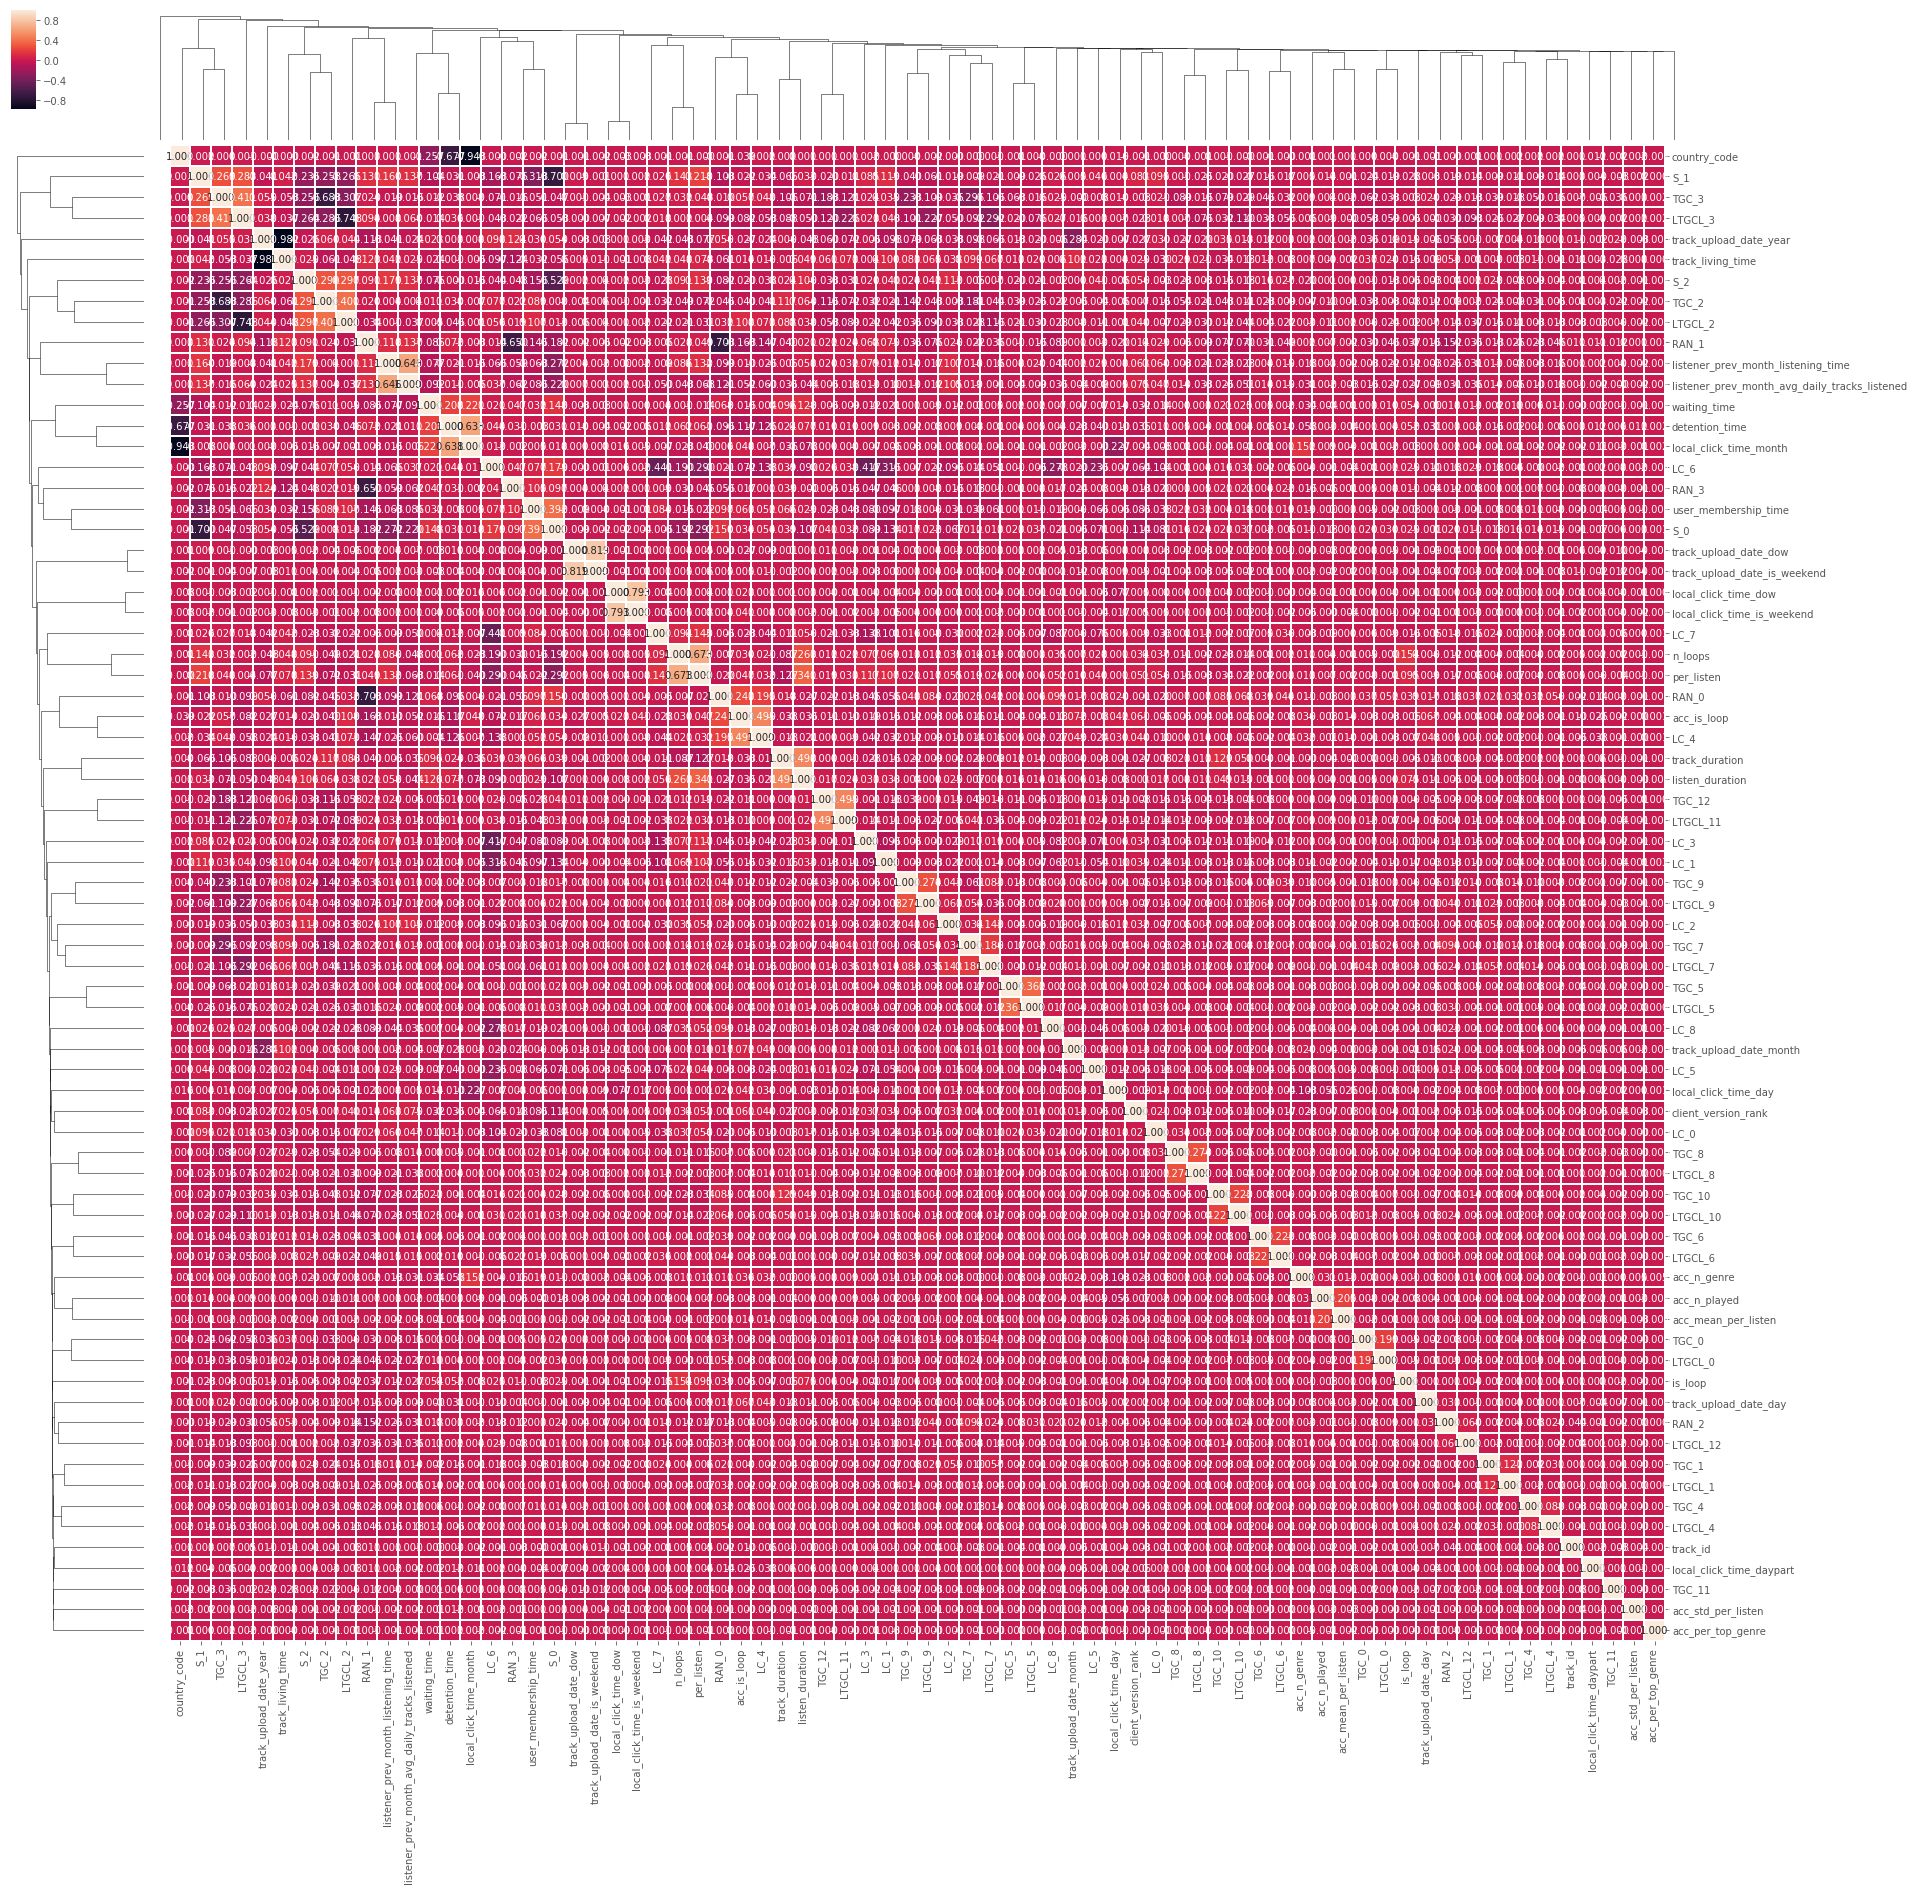

In [12]:
df_data.drop(['track_upload_date_daypart'], 1, inplace=True , errors='ignore')


g = sns.clustermap(df_data.corr(), 
                   linewidths=1, 
#                    cmap="YlGnBu",
                   square=True, 
                   annot=True, 
                   fmt='.3f', 
                   figsize = (30, 30))
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0);

# 5. Model Building
## Picking Target Feature

Since we don't have any class already labelled and any continuous target variable, we need to pick a feature for our target feature to predict skipping action of listener. According to the features we created, `per_listen` will be more suitable for that problem since it obviously gives idea about skipping action. If we pick it as a target feature, this problem will turn out a scoring/probability problem because of having ratio of listening time, which tends between 0 to 1.

If we want to convert that problem to a classfication problem, we can determine a treshold for skipping aciton as a rule of thump. `per_listen` denotes how much percentage of the track that were listened by listener. So, our threshold could be 25%, 50% even 51% and so on. However, before making a decision, we can check out Complementary Cumulative Distribution Function (CCDF) of `per_listen`. It would be give an idea about our reasonanle threshold. According the following plot, we have 65% of instances, whose `per_listen` value is greater than 0.5. Therefore, 0.5 is reasonable, however, when we think about it more realistic, less than 0.5 around 0.25 would be more suitable determine any skipping action.


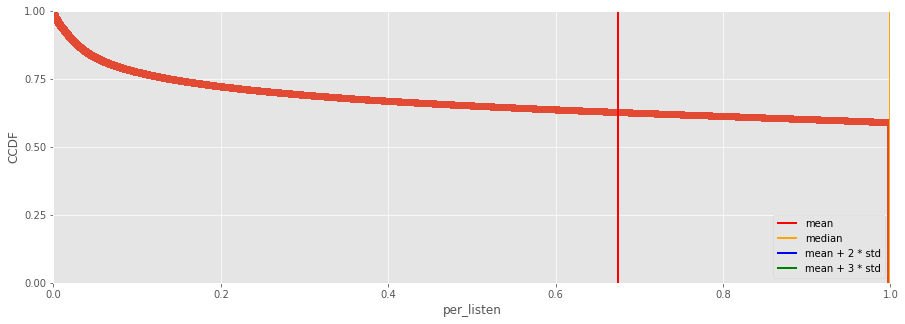

In [13]:
def plot_ccdf(p, f, ax, deltax=None, xlog=False, xlim=[0, 1], deltay=0.25, ylog=False, ylim=[0,1], xlabel = 'x'):

    ecdf = sm.distributions.ECDF(p)
    x = ecdf.x
    y = 1 - ecdf.y
    assert len(x) == len(y)
    if deltax is not None:
        x_ticks = np.arange(xlim[0], xlim[1] + deltax, deltax)
        ax.set_xticks(x_ticks)

    ax.set_xlabel(xlabel)
    ax.set_xlim(xlim[0], xlim[1])
    ax.vlines(np.mean(p), min(y), max(y), color='red', label='mean', linewidth=2)
    ax.vlines(np.median(p), min(y), max(y), color='orange', label='median', linewidth=2)
    ax.vlines(np.mean(p) + 2 * np.std(p), min(y), max(y), color='blue', label='mean + 2 * std', linewidth=2)
    ax.vlines(np.mean(p) + 3 * np.std(p), min(y), max(y), color='green', label='mean + 3 * std', linewidth=2)

    y_ticks = np.arange(ylim[0], ylim[1] + deltay, deltay)
    ax.set_xlabel(f)
    ax.set_ylabel('CCDF')
    ax.set_yticks(y_ticks)
    ax.set_ylim(ylim[0], ylim[1])

    if xlog is True:
        ax.set_xscale('log')

    if ylog is True:
        ax.set_yscale('log')


    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.9)

    ax.legend(loc=4)

    sns.set_style('whitegrid')
    sns.regplot(x=x, y=y, fit_reg=False, scatter=True, ax = ax)
    
    
figure, axes = plt.subplots(figsize=(15,5))
plot_ccdf(df_data['per_listen'], 'per_listen', ax= axes)

## Cleaning Irrelevant Features

We created many different features using `listen_duration` including `per_listen`. `per_listen` is our target feature at this point. Since it has high correlation with `listen_duration`, `n_loops`, `is_loop`. To overcome side effects (dataleakage) in model training, we need to get rid of those features.

In addition, we need to also remove the features in unix time format since we already decompose those time features in the previous stages.

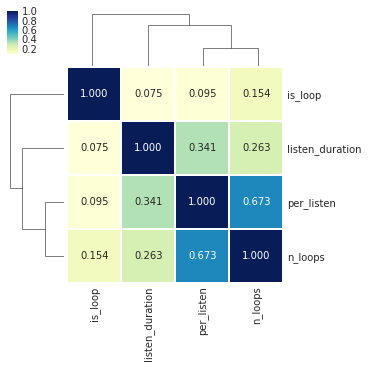

In [14]:
features = ['per_listen', 'listen_duration', 'n_loops', 'is_loop']

g = sns.clustermap(df_data[features].corr(), 
                   linewidths=1, 
                   cmap="YlGnBu", 
                   square=True, 
                   annot=True, 
                   fmt='.3f', 
                   figsize = (5, 5))
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=90); 

In [67]:
drop_list = [
    'track_upload_date',
    'listen_duration',
    'listener_id',
    'listener_signup_date',
    'local_click_time',
    'is_loop',
    'n_loops'
]

df_data.drop(drop_list, 1, inplace=True, errors='ignore')

for i in df_data.columns:
    print(i)

country_code
track_id
track_duration
listener_prev_month_listening_time
listener_prev_month_avg_daily_tracks_listened
waiting_time
detention_time
user_membership_time
track_living_time
per_listen
acc_is_loop
acc_n_played
acc_mean_per_listen
acc_std_per_listen
acc_n_genre
acc_per_top_genre
local_click_time_dow
local_click_time_day
local_click_time_month
local_click_time_daypart
local_click_time_is_weekend
track_upload_date_dow
track_upload_date_day
track_upload_date_month
track_upload_date_is_weekend
track_upload_date_year
client_version_rank
S_0
S_1
S_2
LC_0
LC_1
LC_2
LC_3
LC_4
LC_5
LC_6
LC_7
LC_8
TGC_0
TGC_1
TGC_2
TGC_3
TGC_4
TGC_5
TGC_6
TGC_7
TGC_8
TGC_9
TGC_10
TGC_11
TGC_12
RAN_0
RAN_1
RAN_2
RAN_3
LTGCL_0
LTGCL_1
LTGCL_2
LTGCL_3
LTGCL_4
LTGCL_5
LTGCL_6
LTGCL_7
LTGCL_8
LTGCL_9
LTGCL_10
LTGCL_11
LTGCL_12
skip


## Creating Simple ML Models To Evaluate of Contributes of Features on Skipping

In logistic regression approach, we need to have a class. We created a class called as `skip` by using different thresholds. In this approch, we don't focus on model accuracy since our priority is finding some insight about feature's contribution on skipping. After building a simple model, we will plot coefs of each features to see more deeply about their contribution.

In linear regression approach, we don't need to any class. Since we have already a continuous feature such as `per_listen`, we will use that feature to build a simple model. In that approach, we again to take a look at features' contributions by using coefs found by linear regression.

In [103]:
def plot_contributions(coef, axes):

    df_coef = pd.DataFrame(list(zip(df_X.columns, coef)), columns=['feature', 'coef'])
    df_coef = df_coef.sort_values(['coef'], ascending=False)

    g = sns.barplot(x='coef', y='feature', data=df_coef, ax= axes)
    g.set_xscale('log')

### Logistic Regression by Using Different Thresholds (0.10, 0.25, 0.50, 0.51)

/usr/local/lib/python3.5/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


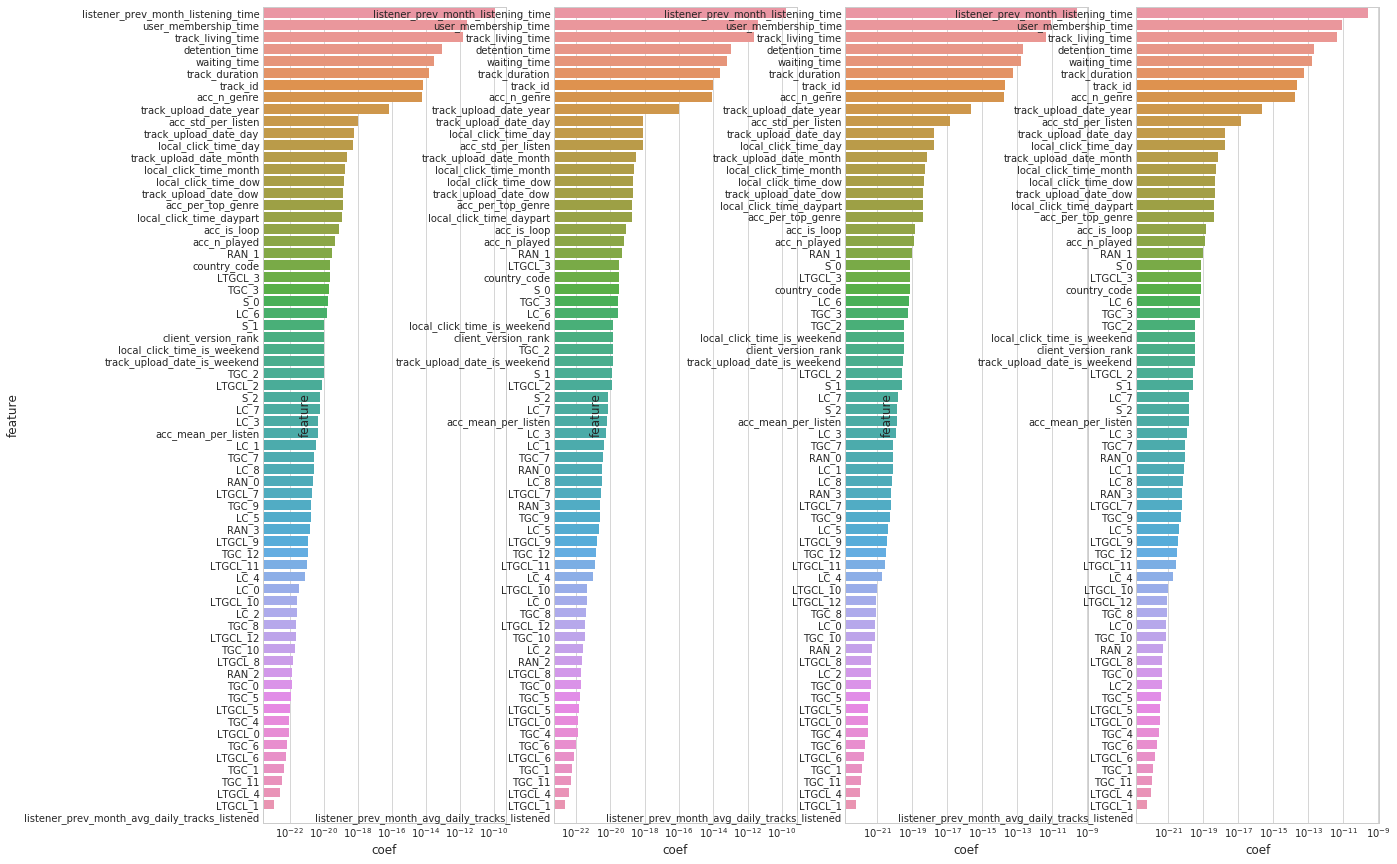

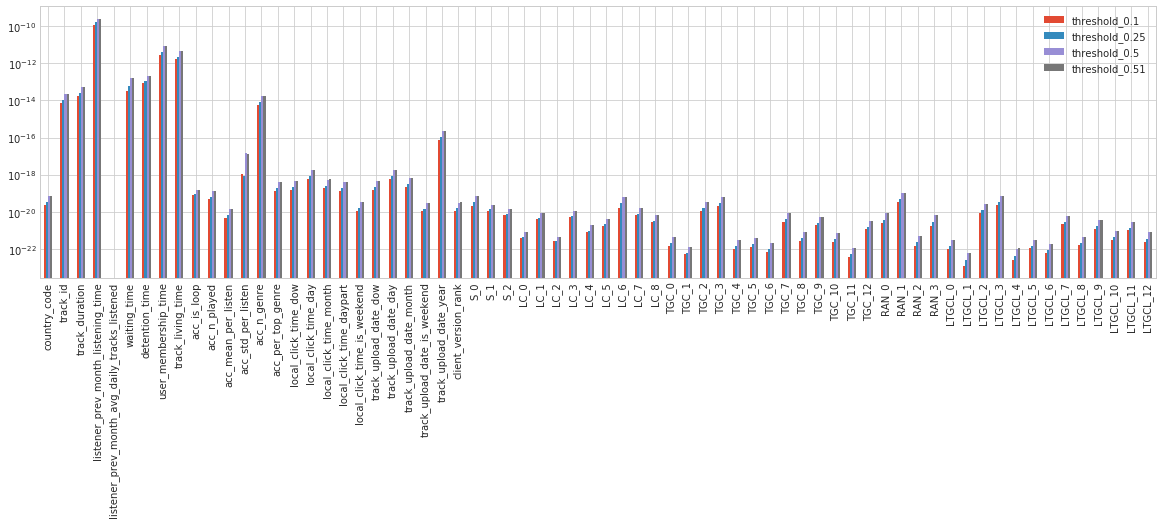

In [114]:
from sklearn.linear_model import LogisticRegression

log_coefs = {}
thresholds = [0.10, 0.25, 0.50, 0.51]
figure, axes = plt.subplots(1, len(thresholds), figsize=(20,15))
for i, threshold in enumerate(thresholds):
    
    # Creating Target Label
    df_data['skip'] = df_data['per_listen'].apply(lambda x : 1 if x < threshold else x)
    df_data['skip'] = df_data['skip'].apply(int)

    # We need to solve missing value. 
    # I could not take look at that issue too much since I have a limited time.
    df_data = df_data.fillna(-9999)

    df_X = df_data.drop(['skip', 'per_listen'], 1, errors='ignore')
    df_y = df_data['skip']

    model = LogisticRegression(penalty='l2')
    model = model.fit(df_X.values, df_y.values)
    
    log_coefs['threshold_{}'.format(threshold)] = model.coef_.tolist()[0]
    plot_contributions(model.coef_.tolist()[0], axes[i])

df_coefs = pd.DataFrame(log_coefs,index=df_X.columns.tolist())
figure, axes = plt.subplots(figsize=(20,5))
df_coefs.plot.bar(logy=True, ax=axes)

When we take a look at top 10 contributors, we can see 7 out of top 10 features are our extracted features in the previous stages. [`user_membership_time`, `track_living_time`, `detention_time`, `acc_n_genre`, `track_upload_date_year`, `acc_std_per_listen`]

In [115]:
# Top10 contributors
df_coefs[['threshold_0.51']].sort_values(['threshold_0.51'], ascending=False).head(10)

threshold_0.51
listener_prev_month_listening_time    2.604617e-10
user_membership_time                  8.265792e-12
track_living_time                     4.553537e-12
detention_time                        2.156754e-13
waiting_time                          1.669765e-13
track_duration                        5.469672e-14
track_id                              2.157967e-14
acc_n_genre                           1.766509e-14
track_upload_date_year                2.263816e-16
acc_std_per_listen                    1.374500e-17

### Linear Regression By using per_listen

/usr/local/lib/python3.5/dist-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


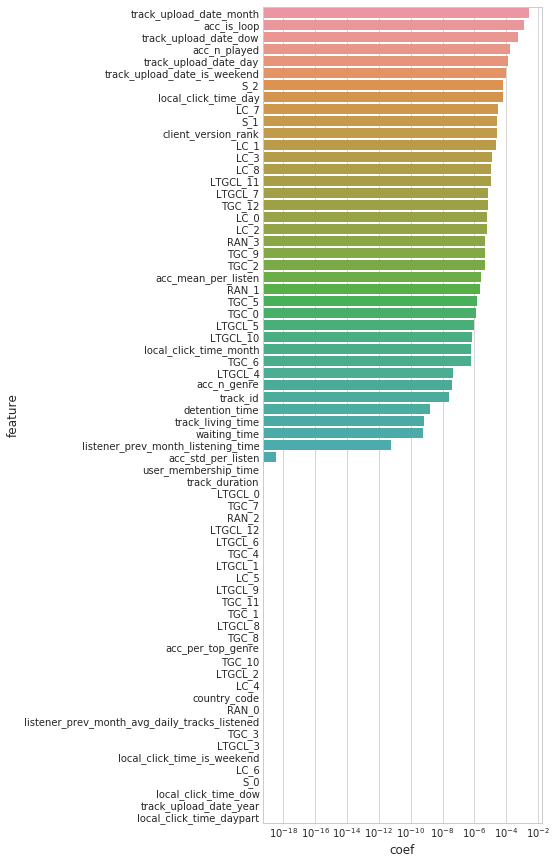

In [116]:
from sklearn.linear_model import LinearRegression

# We need to solve missing value. 
# I could not take look at that issue too much since I have a limited time.
df_data = df_data.fillna(-9999)

df_X = df_data.drop(['skip', 'per_listen'], 1, errors='ignore')
df_y = df_data['per_listen']

model = LinearRegression()
model = model.fit(df_X.values, df_y.values)

figure, axes = plt.subplots(figsize=(5,15))
df_coefs['linear_reg'] = model.coef_

plot_contributions(model.coef_, axes)

When we take a look at top 9 contributors, we can see 7 out of top 10 features are our extracted features in the previous stages.

In [117]:
# Top10 contributors
df_coefs[['linear_reg']].sort_values(['linear_reg'], ascending=False).head(10)

linear_reg
track_upload_date_month         0.002822
acc_is_loop                     0.001228
track_upload_date_dow           0.000545
acc_n_played                    0.000166
track_upload_date_day           0.000121
track_upload_date_is_weekend    0.000097
S_2                             0.000067
local_click_time_day            0.000059
LC_7                            0.000031
S_1                             0.000028

### Comparing Logistic Regression and Linear Regression

After got coefs. for each model, we can compare the results in terms of contribution. When the coefs. are compared, feature contribution of linear regression overwhelmingly is more higher than logistic regressin according to the next plot. In that point, we can think regression approaching would be more sufficient to feature contribution rather than indentifying a threashold for skipping action. In that case, we will take care about residual for regression approach to get more accurate model. So, we used `lightGBM` approach in notebook `Model.ipynb`. 

Please, note that we added whole apporaches we developed so far into that notebook `Model.ipynb`. To overcome dataleakage, we applied each data transformation related to aggreagetion and accumulative statistics on each different fold.

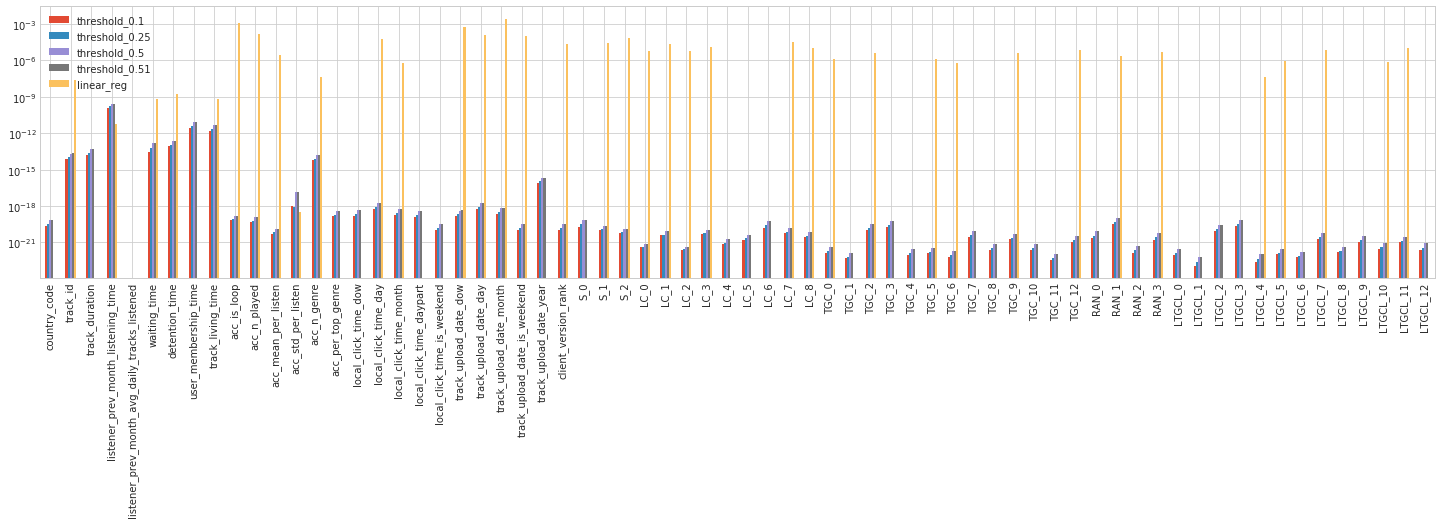

In [118]:
figure, axes = plt.subplots(figsize=(25,5))
df_coefs.plot.bar(logy=True, ax=axes)

In [119]:
df_coefs

threshold_0.1  threshold_0.25  \
country_code                                    2.365549e-20    3.363559e-20   
track_id                                        7.198417e-15    1.020354e-14   
track_duration                                  1.701998e-14    2.524964e-14   
listener_prev_month_listening_time              1.143769e-10    1.643362e-10   
listener_prev_month_avg_daily_tracks_listened  -4.290521e-17   -5.849258e-17   
waiting_time                                    3.109466e-14    6.346939e-14   
detention_time                                  8.875582e-14    1.112887e-13   
user_membership_time                            2.685404e-12    3.866860e-12   
track_living_time                               1.641603e-12    2.215740e-12   
acc_is_loop                                     7.763751e-20    8.466154e-20   
acc_n_played                                    4.688476e-20    6.203411e-20   
acc_mean_per_listen                             4.746145e-21    6.654375e-21   
acc_std_per_listen                              1.068930e-18    8.123991e-19   
acc_n_genre                                     5.859397e-15    8.315140e-15   
acc_per_top_genre                               1.385756e-19    1.857224e-19   
local_click_time_dow                            1.506592e-19    2.136935e-19   
local_click_time_day                            5.770871e-19    8.242832e-19   
local_click_time_month                          1.803662e-19    2.572797e-19   
local_click_time_daypart                        1.283160e-19    1.838340e-19   
local_click_time_is_weekend                     1.081057e-20    1.533147e-20   
track_upload_date_dow                           1.440456e-19    2.046715e-19   
track_upload_date_day                           5.958361e-19    8.458769e-19   
track_upload_date_month                         2.266870e-19    3.205554e-19   
track_upload_date_is_weekend                    1.040858e-20    1.470602e-20   
track_upload_date_year                          7.530386e-17    1.070024e-16   
client_version_rank                             1.109615e-20    1.521233e-20   
S_0                                             1.950266e-20    3.221594e-20   
S_1                                             1.141393e-20    1.323912e-20   
S_2                                             6.461086e-21    7.654558e-21   
LC_0                                            3.856518e-22    4.229200e-22   
...                                                      ...             ...   
TGC_0                                           1.464041e-22    1.986424e-22   
TGC_1                                           4.982222e-23    6.203936e-23   
TGC_2                                           1.028865e-20    1.511875e-20   
TGC_3                                           2.022207e-20    2.851427e-20   
TGC_4                                           9.536537e-23    1.324723e-22   
TGC_5                                           1.261971e-22    1.781653e-22   
TGC_6                                           6.678554e-23    9.673471e-23   
TGC_7                                           2.862663e-21    3.958391e-21   
TGC_8                                           2.518305e-22    3.645484e-22   
TGC_9                                           1.850905e-21    2.558417e-21   
TGC_10                                          2.186293e-22    3.260274e-22   
TGC_11                                          3.415107e-23    5.375268e-23   
TGC_12                                          1.164209e-21    1.547412e-21   
RAN_0                                           2.324739e-21    3.525717e-21   
RAN_1                                           3.325753e-20    4.666098e-20   
RAN_2                                           1.485204e-22    2.187346e-22   
RAN_3                                           1.646891e-21    2.704181e-21   
LTGCL_0                                         9.422768e-23    1.369081e-22   
LTGCL_1                                        